In [1]:
import scanpy as sc
import muon as mu
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from threadpoolctl import threadpool_limits

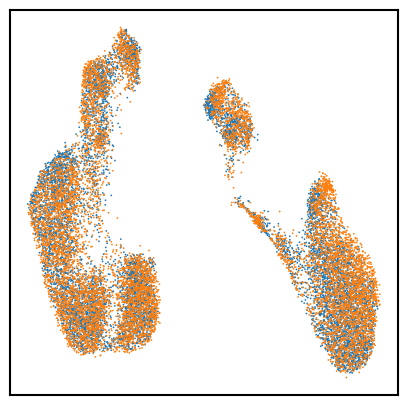

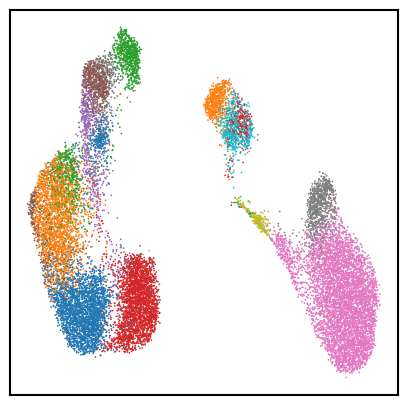

In [4]:
methods = ['scMamba', 'scCLIP', 'CVQVAE', 'GLUE', 'SCALEX', 'scVI', 'Scanorama', 'Harmony']
methods = ['scMamba']
dataset = "PBMC10k"
for method in methods:
    adata = sc.read_h5ad(f"../results/robustness_analysis/{dataset}batchsize256projection_dim50/concat.h5ad")
    adata.obs['modality'] = adata.obs['modality'].cat.add_categories(['scRNA-seq', 'scATAC-seq'])
    adata.obs.loc[adata.obs['modality'] == 'rna', "modality"] = "scRNA-seq"
    adata.obs.loc[adata.obs['modality'] == 'atac', "modality"] = "scATAC-seq"
    adata.obs['modality'] = adata.obs['modality'].cat.remove_categories(['rna', 'atac'])
    
    sc.tl.umap(adata, min_dist=0.4, spread=1.0)

    fig1, ax1 = plt.subplots(1, 1, figsize=(5, 5))
    sc.pl.umap(
        adata, 
        color="modality", 
        ax=ax1, 
        palette=['#1f77b4', '#ff7f0e'],
        show=False, 
        legend_loc=None
        # wspace=0.65, 
        # ncols=4
    )
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.set_title("", fontsize=13)
    # Add thick border
    for spine in ax1.spines.values():
        spine.set_edgecolor('black')  # Set border color
        spine.set_linewidth(1.5)  # Set border thickness

    fig1.show()
    save_dir = "."
    fig1.savefig(os.path.join(save_dir, f"{method}_umap1.png"), dpi=800, pad_inches=0, transparent=True)
    
    fig2, ax2 = plt.subplots(1, 1, figsize=(5, 5))
    sc.pl.umap(
        adata, 
        color="cell_type", 
        ax=ax2, 
        palette=sns.color_palette(
        "tab10", np.unique(adata.obs["cell_type"].values).size
        ), 
        # palette=set2_palette,
        show=False, 
        legend_loc=None
        # wspace=0.65, 
        # ncols=4
    )
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_title("", fontsize=13)
    # Add thick border
    for spine in ax2.spines.values():
        spine.set_edgecolor('black')  # Set border color
        spine.set_linewidth(1.5)  # Set border thickness
    fig2.show()
    fig2.savefig(os.path.join(save_dir, f"{method}_umap2.png"), dpi=800, pad_inches=0, transparent=True)
    # save_dir = f"{dataset}_umap"
    # fig.savefig(os.path.join(save_dir, f"{method}_umap_results.pdf"), dpi=500, format='pdf')